# Regresion Polinomica
Le debemos de indicar los grados de ese polinomial, y la variable independiente debemos de convertir en ese grado

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

from colorama import Fore, Back, Style

## Data

In [59]:
"""Es un diminuto conjunto de datos en donde se expresa el sueldo de las personas en diferentes jerarquias y obligaciones"""

pos =[x for x in range(1,11)]
post = ['Pasante de Desarrollo','Desarrollador Junior','Desarrollador Intermedio','Desarrollador Senior','Lider de Proyecto','Gerente de Proyecto','Arquitecto de Software','Director de Desarrollo','Director de Tecnologia','Director Ejecutivo(CEO)']


salary = [1200.0, 2500.0, 4000.0, 4800.0, 6500.0, 9000.0, 12820.0, 15000.0, 25000.0, 50000.0]



data = {
  'position':post,
  'years':pos,
  'salary':salary
}

data = pd.DataFrame(data)
print(Fore.RED + "Totalidad de Datos" + Style.RESET_ALL)
print(data)

print(Fore.BLUE + "Describe" + Style.RESET_ALL)
print(data.describe())

Totalidad de Datos
                   position  years   salary
0     Pasante de Desarrollo      1   1200.0
1      Desarrollador Junior      2   2500.0
2  Desarrollador Intermedio      3   4000.0
3      Desarrollador Senior      4   4800.0
4         Lider de Proyecto      5   6500.0
5       Gerente de Proyecto      6   9000.0
6    Arquitecto de Software      7  12820.0
7    Director de Desarrollo      8  15000.0
8    Director de Tecnologia      9  25000.0
9   Director Ejecutivo(CEO)     10  50000.0
Describe
          years        salary
count  10.00000     10.000000
mean    5.50000  13082.000000
std     3.02765  14805.949105
min     1.00000   1200.000000
25%     3.25000   4200.000000
50%     5.50000   7750.000000
75%     7.75000  14455.000000
max    10.00000  50000.000000


### Visualizacion Simple
Si aplicamos regresion Lineal pasaria esto 

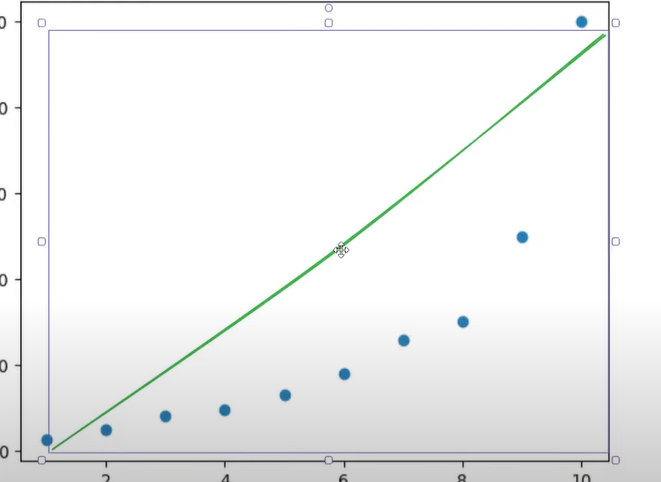

El problema es que no cubre la mayoria de puntos


Si aplicamos regresion Polinomial

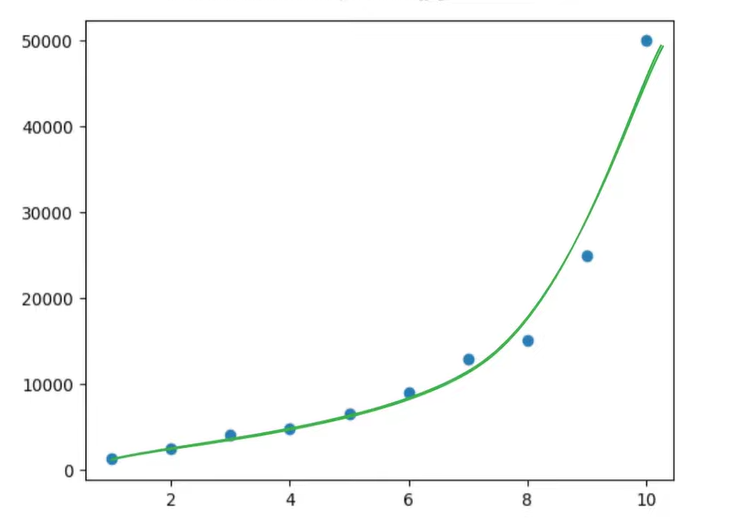


Aca la mayor cantidad de datos lo tomamos



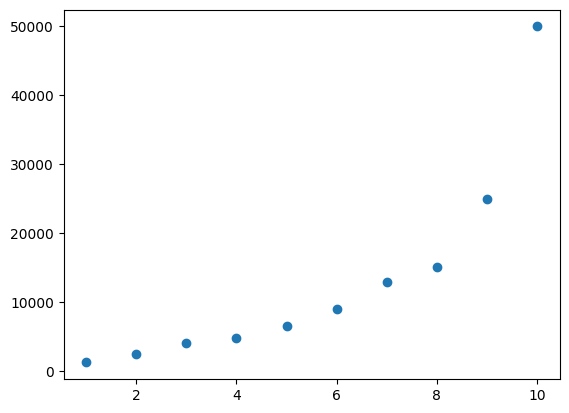

In [60]:
"""A que se ve que los datos no son lineales, es decir tienen una curvatura"""

plt.scatter(data["years"], data["salary"])
plt.show()

### Ejemplo de Implementacion con Regresion Lineal(Mal)

[31580.]


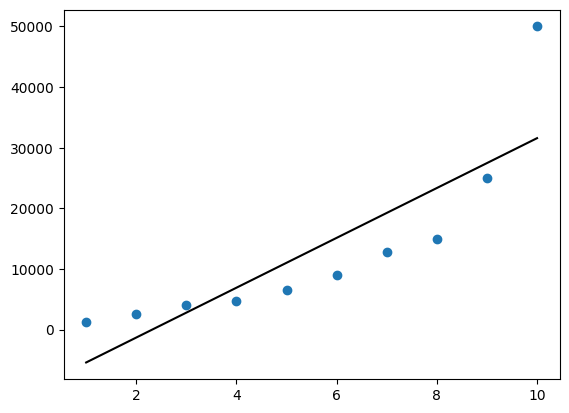

In [61]:
X = data.iloc[:,1].values.reshape(-1,1) # Tomaremos la columna en la posicion 1 que seria year
y = data.iloc[:,-1].values # Tomaremos solo la primera columan de la derecha que seria salary

from sklearn.linear_model import LinearRegression

regression = LinearRegression()
## No haremos conjunto de testing y trainig debido a que el conjunto de datos es demasiado diminuto, por que lo tomaremos todo para el training
regression.fit(X,y)

plt.scatter(data["years"],data["salary"])
plt.plot(X, regression.predict(X), color="black")
### Nueva prediccion
print(regression.predict([[10]])) # Aca el valor que ponemos seria el año, y retornara el salario en funcion al año introducido
plt.show()

### Modelo Polinomial

In [62]:
from sklearn.preprocessing import PolynomialFeatures # Nos permite  encargarnos del grado, para asi indicar los grados de los independientes

poly =PolynomialFeatures(degree=3) # Grados de 3, un polinomio de grado 3
X_poly = poly.fit_transform(X) # Transformamos la X en grado 3
X_poly




array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [63]:
regression_2 = LinearRegression()
regression_2.fit(X_poly, y) # Ya le pasamos X transformado

LinearRegression()

[3901.88344988]


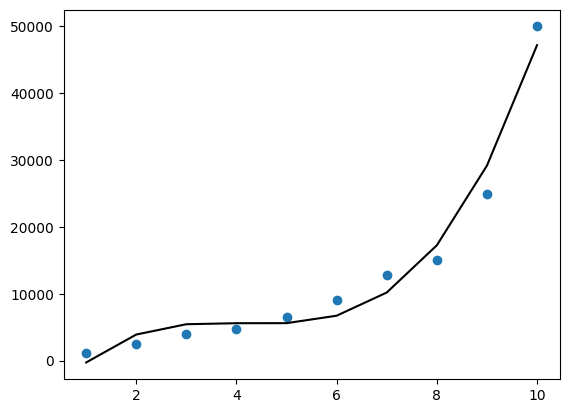

In [64]:
plt.scatter(data["years"],data["salary"])
plt.plot(X, regression_2.predict(X_poly), color="black")
### Nueva prediccion
predict = poly.fit_transform([[2]])
print(regression_2.predict(predict))
plt.show()

In [65]:
### Metricas

from sklearn.metrics import r2_score, mean_squared_error

y_pred = regression_2.predict(X_poly)

print(r2_score(y, y_pred))
print(mean_squared_error(y,y_pred, squared=False))

0.9745464790183823
2240.9462516008975
